In [1]:
# Remove the FutureWarnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [162]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from time import process_time

from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, classification_report

# 1. The dataset

## 1.1 Read and display

In [3]:
df = pd.read_csv('/home/joanne/perso/Rokkasho/DSTI/lessons/module_02/machineLearningPython/project/stroke_data.csv', sep=',', index_col='id')

In [4]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1


In [5]:
df.tail(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 1.2 Values and number of occurence of categorical attributes:

In [7]:
for attribute in df.columns:
  if attribute not in ['age', 'bmi', 'avg_glucose_level']:
    print("Values and number of occurence for the attribute '%s' :"%attribute)
    for val in df[attribute].unique():
      print("%15s : %d"%(val, df[attribute][df[attribute]==val].count()))
    print()

Values and number of occurence for the attribute 'gender' :
           Male : 2115
         Female : 2994
          Other : 1

Values and number of occurence for the attribute 'hypertension' :
              0 : 4612
              1 : 498

Values and number of occurence for the attribute 'heart_disease' :
              1 : 276
              0 : 4834

Values and number of occurence for the attribute 'ever_married' :
            Yes : 3353
             No : 1757

Values and number of occurence for the attribute 'work_type' :
        Private : 2925
  Self-employed : 819
       Govt_job : 657
       children : 687
   Never_worked : 22

Values and number of occurence for the attribute 'Residence_type' :
          Urban : 2596
          Rural : 2514

Values and number of occurence for the attribute 'smoking_status' :
formerly smoked : 885
   never smoked : 1892
         smokes : 789
        Unknown : 1544

Values and number of occurence for the attribute 'stroke' :
              1 : 249
     

## 1.3 Pie plot of numerical attributes:

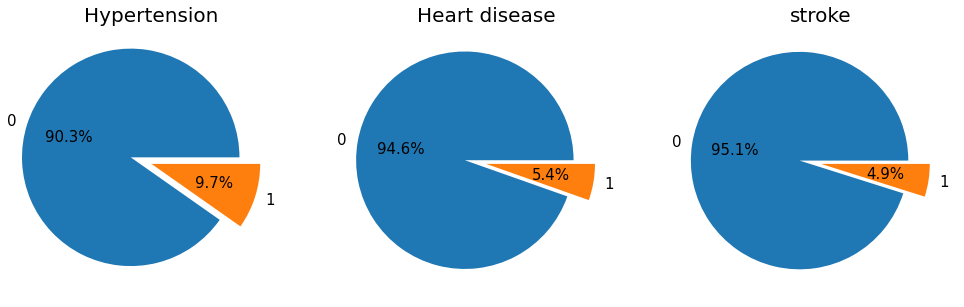

In [10]:
plt.figure(figsize=(17,5))
# Hypertension:
plt.subplot(131)
plt.pie(df.hypertension.value_counts(), labels=df.hypertension.value_counts().index,autopct='%1.1f%%',
        explode=[0.2,0], textprops = {"fontsize":15})
plt.title("Hypertension", fontsize=20)

# heart disease:
plt.subplot(132)
plt.pie(df.heart_disease.value_counts(), labels=df.heart_disease.value_counts().index,autopct='%1.1f%%',
        explode=[0.2,0], textprops = {"fontsize":15})
plt.title("Heart disease", fontsize=20)

# Stroke:
plt.subplot(133)
plt.pie(df.stroke.value_counts(), labels=df.stroke.value_counts().index,autopct='%1.1f%%',
        explode=[0.2,0], textprops = {"fontsize":15})
plt.title("stroke", fontsize=20)

plt.show()

## 1.4 Histogram and boxplot of and boxplot the numerical attributes

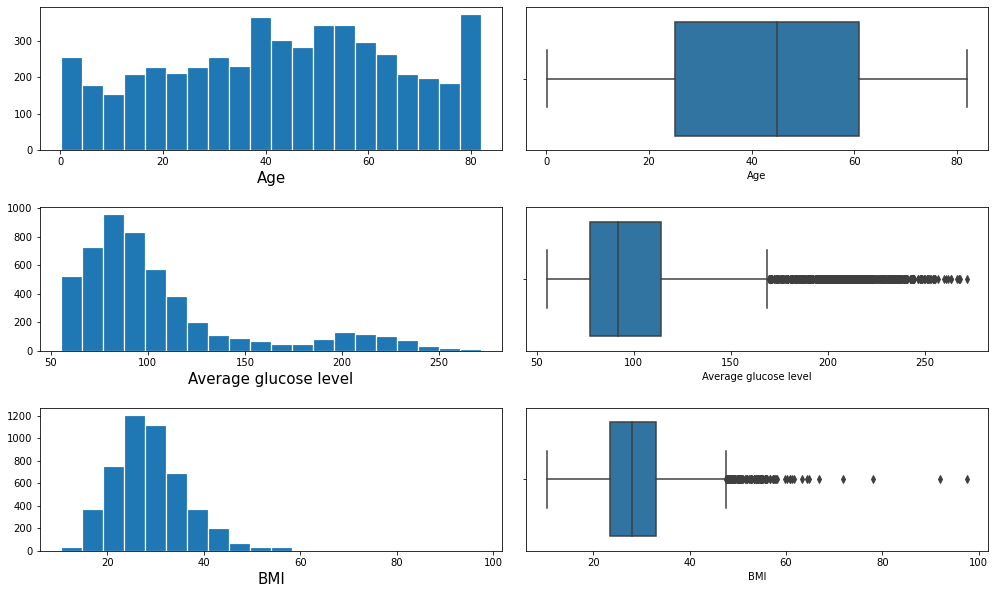

In [12]:
plt.figure(figsize=(17,10))
plt.subplots_adjust(hspace=0.4, wspace=0.05)

# -----------------------------------------------------------------------------
# First line : Age
plt.subplot(321)
plt.hist(df.age, bins=20, edgecolor='white', linewidth=1.2)
plt.xlabel("Age", fontsize=15)

plt.subplot(322)
sns.boxplot(x=df.age)
plt.xlabel("Age")

# -----------------------------------------------------------------------------
# Second line : Avg_glucose_level
plt.subplot(323)
plt.hist(df.avg_glucose_level, bins=20, edgecolor='white', linewidth=1.2)
plt.xlabel("Average glucose level", fontsize=15)

plt.subplot(324)
sns.boxplot(x=df.avg_glucose_level)
plt.xlabel("Average glucose level")

# -----------------------------------------------------------------------------
# Third line : BMI
plt.subplot(325)
plt.hist(df.bmi, bins=20, edgecolor='white', linewidth=1.2)
plt.xlabel("BMI", fontsize=15)

plt.subplot(326)
sns.boxplot(x=df.bmi)
plt.xlabel("BMI")

plt.show()

In [13]:
# --- Identification of the outliers values of BMI (large values):
df.bmi.sort_values(ascending=False).head(10)

id
56420    97.6
51856    92.0
41097    78.0
545      71.9
37759    66.8
66333    64.8
70670    64.4
20292    63.3
72784    61.6
65895    61.2
Name: bmi, dtype: float64

## 1.5 Search if obvious relations between features of the dataset

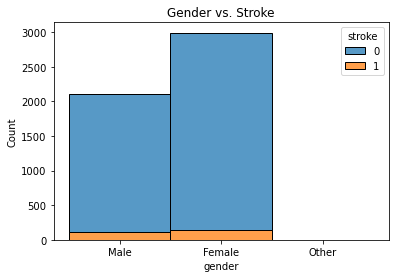

In [14]:
# gender vs. stroke:
sns.histplot(data=df, x="gender", hue="stroke", multiple="stack")
plt.title("Gender vs. Stroke")
plt.show()

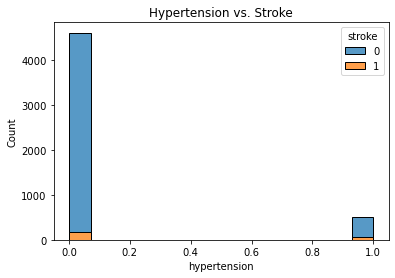

In [15]:
# hypertension vs. stroke:
sns.histplot(data=df, x="hypertension", hue="stroke", multiple="stack")
plt.title("Hypertension vs. Stroke")
plt.show()

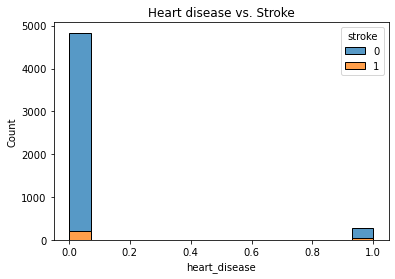

In [16]:
# heart_disease vs. stroke:
sns.histplot(data=df, x="heart_disease", hue="stroke", multiple="stack")
plt.title("Heart disease vs. Stroke")
plt.show()

## 1.6 Looking for any missing values

In [17]:
# --- Where are the missing values:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## 1.7 Renaming one attribute

In [18]:
# All attributes name start with lower-case letter, except one. Correct it:
df.rename(columns={"Residence_type":"residence_type"}, inplace=True)

# 2. Feature engineering

## 2.1 Categorical attributes to binary attributes

### 2.1.1 'ever_married' attribute

In [19]:
# Change Ever_married : No/Yes -> 0/1
df.loc[:, ["ever_married"]] = pd.get_dummies(df.ever_married, drop_first=True).values

df.ever_married

id
9046     1
51676    1
31112    1
60182    1
1665     1
        ..
18234    1
44873    1
19723    1
37544    1
44679    1
Name: ever_married, Length: 5110, dtype: int64

### 2.1.2 'residence_type' attribute

In [20]:
# Change residence_type : rural/urban -> 0/1
df.loc[:, ["residence_type"]] = pd.get_dummies(df.residence_type, drop_first=True).values

df.rename(columns={"residence_type":"urban_residence"}, inplace=True)

df.urban_residence

id
9046     1
51676    0
31112    0
60182    1
1665     0
        ..
18234    1
44873    1
19723    0
37544    0
44679    1
Name: urban_residence, Length: 5110, dtype: int64

### 2.1.3 'gender' attribute

In [21]:
# Gender is Male/Female/Other. 
# Only one 'Other' for id=56156. This person did not have a stroke. 
# The size of the population of the person who did not have a stroke is very large (4 861) 
# compared to the population of the person who did have a stroke (249). 
# We can discard this only data as it might not affect much the result. 
#  display(self.df.loc[self.df.gender=='Other', 'stroke'])

# what ID for the gender=Other:
df.gender.loc[df.gender=='Other']

# Look at the attribute values for gender=Other:
df.loc[df.gender=='Other']

# Remove it:
df = df.drop(index=df.loc[df.gender=='Other',:].index)

In [22]:
# Change gender : Male/Female -> 0/1:
df.loc[:, ["gender"]] = pd.get_dummies(df.gender, drop_first=True).values

df.rename(columns={"gender":"gender_female"}, inplace=True)

df.gender_female

id
9046     1
51676    0
31112    1
60182    0
1665     0
        ..
18234    0
44873    0
19723    0
37544    1
44679    0
Name: gender_female, Length: 5109, dtype: int64

### 2.1.4 'work_type' attribute

In [23]:
# Create new columns for the work_type:
df = pd.concat([df, pd.get_dummies(df.work_type)],axis=1).drop(columns="work_type")

df.rename(columns={"Private":"job_private", 
                   "Govt_job":"job_government", 
                   "Never_worked":"job_never", 
                   "children":"job_children", 
                   "Self-employed":"job_selfemployed"}, inplace=True)

### 2.1.5 'smoking_status' attribute

In [24]:
# Create new columns for the smoking status ?
#    Never smoked : 1892
#         Unknown : 1544
# formerly smoked : 884
#          smokes : 789

# We have two choices : 
# 1. ordinal encoding: 
#     unknown -> nan 
#       never -> 1 
#    formerly -> 2
#      smokes -> 3
# 2.  vector encoding: one column per value

# Keep a saving of the current state of the dataset:
df_svg = df.copy()

In [25]:
# Try Ordinal encoding:
df['smoking_status'] = df['smoking_status'].replace(['Unknown']        , np.nan)
df['smoking_status'] = df['smoking_status'].replace(['never smoked']   , 1)
df['smoking_status'] = df['smoking_status'].replace(['formerly smoked'], 2)
df['smoking_status'] = df['smoking_status'].replace(['smokes']         , 3)

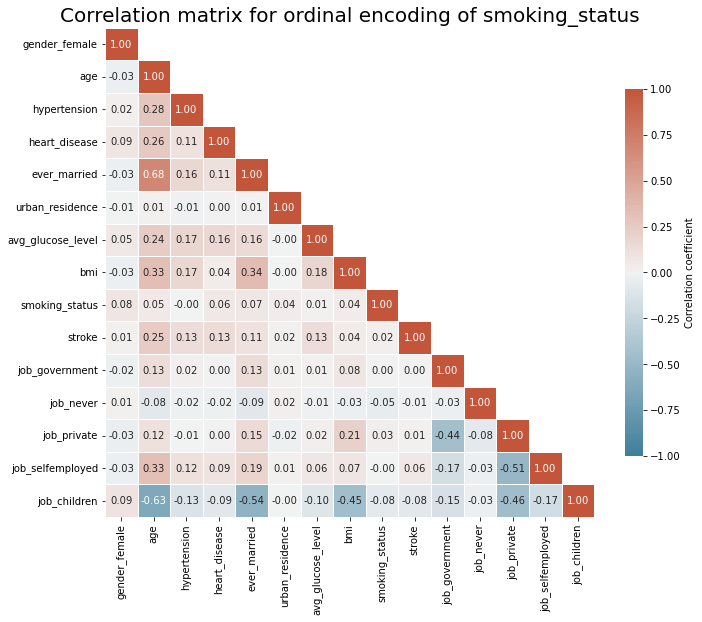

In [26]:
# Check the correlation matrix if we see significant relation between the smoking_status and the rest:

# ----- Plot the correlation matrix :
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) # Remove the useless upper-triangle from the plot.
np.fill_diagonal(mask, False) # Keep plotting the diagonal.

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, vmin =-1,
            square=True, linewidths=.5, annot=True,
            fmt='0.2f', annot_kws={'size': 10},
            cbar_kws={"shrink": .75, "label":"Correlation coefficient"})

plt.title("Correlation matrix for ordinal encoding of smoking_status", fontsize=20)
plt.show()

# --> no significant correlation between 'smoking_status' and the other attributes.

In [27]:
# Try vector encoding:

# Get back the original dataset:
df = df_svg.copy()

# keep Unknown as a valid value... `
df = pd.concat([df, pd.get_dummies(df.smoking_status)],axis=1).drop(columns="smoking_status")

df.rename(columns={"Unknown":"smoker_unknown", 
                "never smoked":"smoker_never", 
             "formerly smoked":"smoker_formerly", 
                      "smokes":"smoker"}, inplace=True)

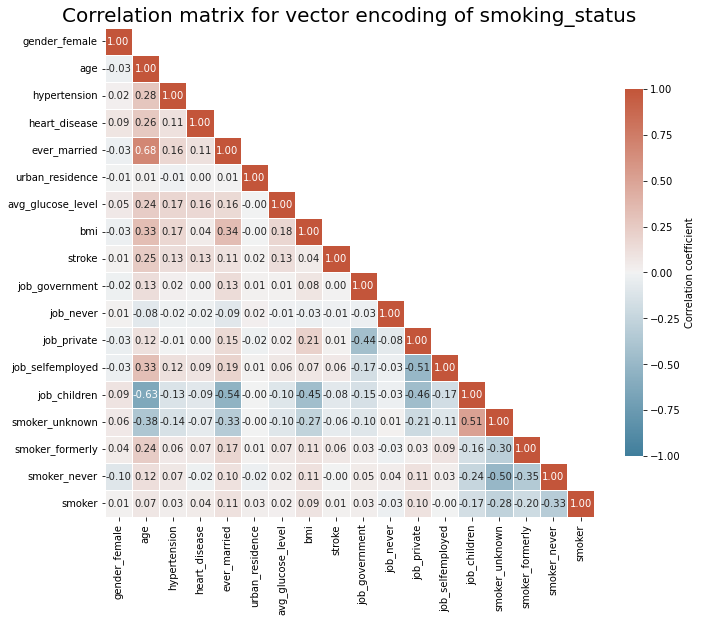

In [28]:
# Check the correlation matrix if we see significant relation between the smoking_status and the rest:

# ----- Plot the correlation matrix :
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) # Remove the useless upper-triangle from the plot.
np.fill_diagonal(mask, False) # Keep plotting the diagonal.

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, vmin =-1,
            square=True, linewidths=.5, annot=True,
            fmt='0.2f', annot_kws={'size': 10},
            cbar_kws={"shrink": .75, "label":"Correlation coefficient"})

plt.title("Correlation matrix for vector encoding of smoking_status", fontsize=20)
plt.show()

# --> some correlation appear and the size of the dataset is not much bigger, we keep this configuration.

### 2.1.6 'bmi' attribute

In [29]:
# BMI attribute shows some outliers with large values. We remove the largest:
# Remove the two entries with bmi>90
df = df.drop(index=df.loc[df.bmi>90,:].index)

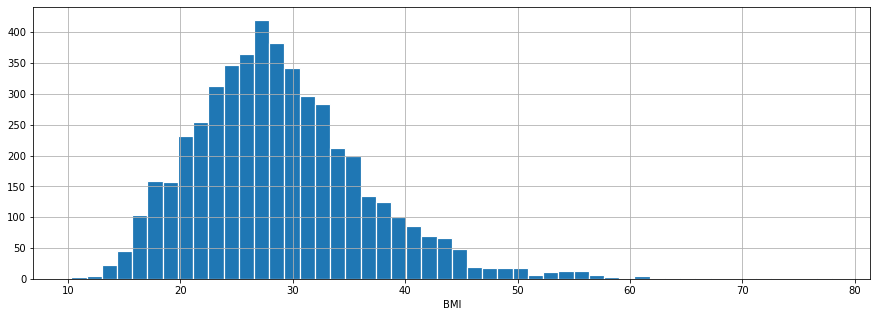

In [32]:
# --- Searches on BMI to replace missing values
plt.figure(figsize=(15,5))
df.bmi.hist(bins=50, edgecolor='white', linewidth=1.2)
plt.xlabel("BMI")
plt.show()

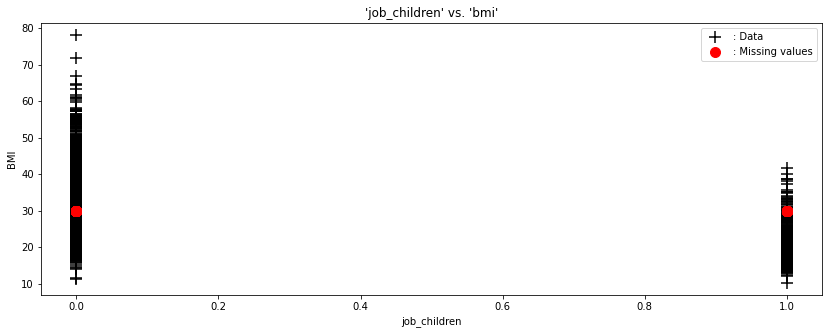

In [33]:
# Look at the distribution of the missing 'bmi' values vs. 'job_children'  (because strongest correlation)
# Missing 'bmi' values are plotted with a value of 30 to be visible on the plot.

plt.figure(figsize=(14,5))
plt.scatter(df.job_children, df.bmi, marker='+', color='0', s=150)
plt.scatter(df.job_children[df.bmi.isna()], [30]*len(df['job_children'][df.bmi.isna()]), marker='o', color='red', s=100)

plt.xlabel("job_children")
plt.ylabel("BMI")
plt.legend([": Data", ": Missing values"])
plt.title("'job_children' vs. 'bmi'")
plt.show()

# --> Not usefull because bolean values of job_children.

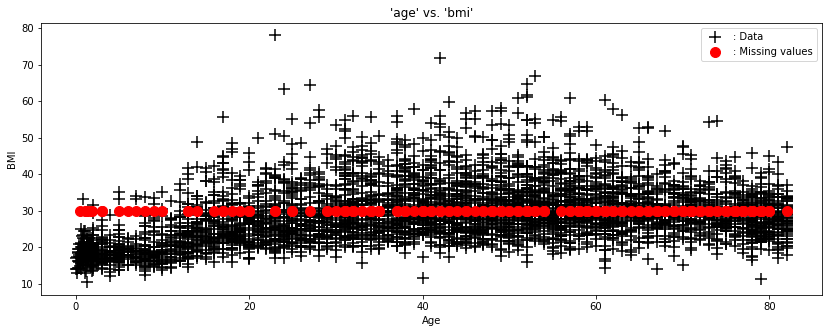

In [34]:
# Look at the distribution of the missing 'bmi' values vs. 'age' 
# (second strongest correlation and numerical values)
# Missing 'bmi' values are plotted with a value of 30 to be visible on the plot.

plt.figure(figsize=(14,5))
plt.scatter(df.age, df.bmi, marker='+', color='0', s=150)
plt.scatter(df.age[df.bmi.isna()], [30]*len(df['age'][df.bmi.isna()]), marker='o', color='red', s=100)

plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend([": Data", ": Missing values"])
plt.title("'age' vs. 'bmi'")
plt.show()

# --> Not usefull because bolean values of job_children.

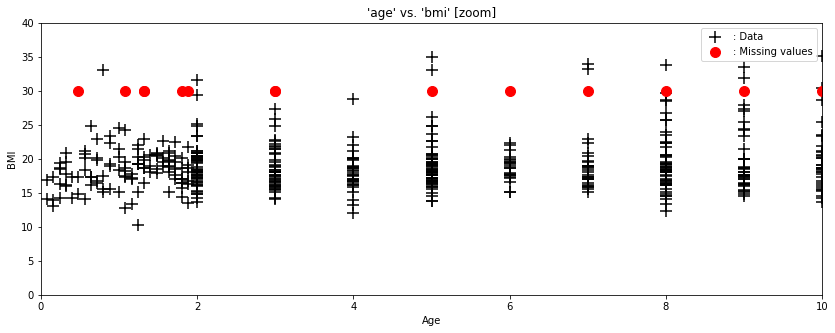

In [35]:
# Values are discrete and integers for age >= 2
plt.figure(figsize=(14,5))
plt.scatter(df.age, df.bmi, marker='+', color='0', s=150)
plt.scatter(df.age[df.bmi.isna()], [30]*len(df['age'][df.bmi.isna()]), marker='o', color='red', s=100)

plt.xlabel("Age")
plt.ylabel("BMI")
plt.xlim([0, 10])
plt.ylim([0, 40])
plt.legend([": Data", ": Missing values"])
plt.title("'age' vs. 'bmi' [zoom]")
plt.show()

In [36]:
# Search for the average bmi for each discrete age: 
  
# Update BMI to remove missing values:
avg_bmi_per_age = df.groupby(["age"]).mean().bmi
  
ages = list(avg_bmi_per_age.index)
bmi_per_age = avg_bmi_per_age.values
  
# Create a dictionary to link each age to a average BMI:
testi = {}
for k in range(len(ages)):
  testi[ages[k]] = bmi_per_age[k]
  
# Replace the missing BMI:
for k in df.loc[df.bmi.isna()].index:
  df.loc[k, "bmi"] = testi[df.loc[k, "age"]]

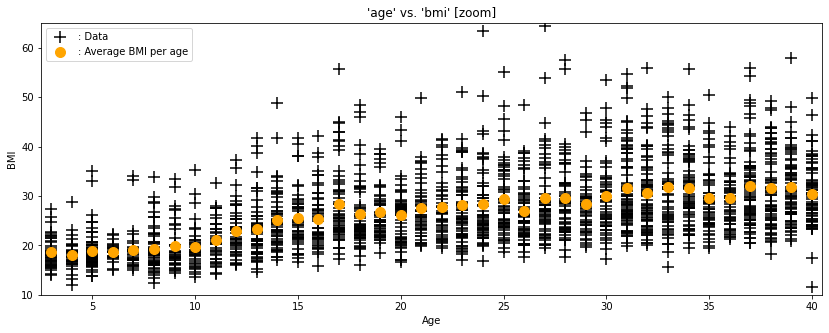

In [37]:
# Display the new values of 'bmi' as a function of age:

plt.figure(figsize=(14,5))
plt.scatter(df.age, df.bmi, marker='+', color='0', s=150)
plt.scatter(ages, bmi_per_age ,marker='o', color='orange', s=100)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.xlim(2.5, 40.5)
plt.ylim(10,65)
plt.legend([": Data", ": Average BMI per age"]) 
plt.title("'age' vs. 'bmi' [zoom]")
plt.show()

In [38]:
# Check if all missing values are replaced :
print("Number of missing 'bmi' values : %d"%df.bmi.isna().sum())


Number of missing 'bmi' values : 0


## 2.2 Removing attributes

In [39]:
# Very small correlation for 'urban_residence'
df = df.drop(columns="urban_residence") 

# Correlations for "job_never" and "gender_female" are very small too (but not as small). Should be removed too ?

# 2.3 Scaling of the numerical attributes

In [40]:
# Scale the numerical columns to be in the range [0-1]:
df[["age", "bmi", "avg_glucose_level"]].describe()

,age,bmi,avg_glucose_level
count,5107.000000,5107.000000,5107.000000
mean,43.236146,28.892771,106.158749
std,22.614905,7.620215,45.284350
min,0.080000,10.300000,55.120000
25%,25.000000,23.700000,77.270000
50%,45.000000,28.300000,91.890000
75%,61.000000,32.800000,114.090000
max,82.000000,78.000000,271.740000


In [41]:
# Scaling 'age':
mini = np.min(df.age)
maxi = np.max(df.age)
df.age = (df.age - mini) / (maxi - mini)

In [42]:
# Scaling 'bmi' :
mini = np.min(df.bmi)
maxi = np.max(df.bmi)
df.bmi = (df.bmi - mini) / (maxi - mini)

In [43]:
# Scaling 'avg_glucose_level' :
mini = np.min(df.avg_glucose_level)
maxi = np.max(df.avg_glucose_level)
df.avg_glucose_level = (df.avg_glucose_level - mini) / (maxi - mini)

In [44]:
# The three attributes are now in the range [0;1]
df[["age", "bmi", "avg_glucose_level"]].describe()

,age,bmi,avg_glucose_level
count,5107.000000,5107.000000,5107.000000
mean,0.526808,0.274635,0.235614
std,0.276061,0.112559,0.209050
min,0.000000,0.000000,0.000000
25%,0.304199,0.197932,0.102253
50%,0.548340,0.265879,0.169744
75%,0.743652,0.332349,0.272228
max,1.000000,1.000000,1.000000


## 2.4 Final dataset

In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender_female,5107.0,0.413746,0.492552,0.0,0.000000,0.000000,1.000000,1.0
age,5107.0,0.526808,0.276061,0.0,0.304199,0.548340,0.743652,1.0
hypertension,5107.0,0.097122,0.296152,0.0,0.000000,0.000000,0.000000,1.0
heart_disease,5107.0,0.054043,0.226126,0.0,0.000000,0.000000,0.000000,1.0
ever_married,5107.0,0.656354,0.474971,0.0,0.000000,1.000000,1.000000,1.0
avg_glucose_level,5107.0,0.235614,0.209050,0.0,0.102253,0.169744,0.272228,1.0
bmi,5107.0,0.274635,0.112559,0.0,0.197932,0.265879,0.332349,1.0
stroke,5107.0,0.048757,0.215380,0.0,0.000000,0.000000,0.000000,1.0
job_government,5107.0,0.128647,0.334842,0.0,0.000000,0.000000,0.000000,1.0
job_never,5107.0,0.004308,0.065499,0.0,0.000000,0.000000,0.000000,1.0


In [46]:
df

,gender_female,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,job_government,job_never,job_private,job_selfemployed,job_children,smoker_unknown,smoker_formerly,smoker_never,smoker
id,,,,,,,,,,,,,,,,,
9046,1,0.816895,0,1,1,0.801265,0.388479,1,0,0,1,0,0,0,1,0,0
51676,0,0.743652,0,0,1,0.679023,0.293796,1,0,0,0,1,0,0,0,1,0
31112,1,0.975586,0,1,1,0.234512,0.327917,1,0,0,1,0,0,0,0,1,0
60182,0,0.597168,0,0,1,0.536008,0.355982,1,0,0,1,0,0,0,0,0,1
1665,0,0.963379,1,0,1,0.549349,0.202363,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,0,0.975586,1,0,1,0.132167,0.273022,0,0,0,1,0,0,0,0,1,0
44873,0,0.987793,0,0,1,0.323516,0.438700,0,0,0,0,1,0,0,0,1,0
19723,0,0.426270,0,0,1,0.128658,0.299852,0,0,0,0,1,0,0,0,1,0


# 3. Modeling

## 3.1 Dataset splitting

The dataset is split into :

- training set
 - x_train : data for training
 - y_train : solution for training
- testing set --
 - x_test : data for testing
 - y_test : solution for testing

K-fold is applied with k=5

In [47]:
x = df.loc[:, df.columns != 'stroke'] # data
y = df.loc[:, df.columns == 'stroke'] # target

# Store all the sets:
x_train = []
y_train = []
x_test  = []
y_test  = []

# k-fold spliting (k=5):
strat_kfold = StratifiedKFold(n_splits = 5)
for train_index, test_index in strat_kfold.split(x, y):
  # Values for the training data:
  x_train.append( x.iloc[train_index,:])
  y_train.append( y.iloc[train_index,:])

  # Values for the test data:
  x_test.append( x.iloc[test_index,:])
  y_test.append( y.iloc[test_index,:])

In [48]:
len(x_train)

5

## 3.2 Class imbalance

The target attribute ('stroke') is ill-represented (much better '0' than '1').
We are in the case of class imbalance.

The dataset of over-sampled using SMOTE technique.

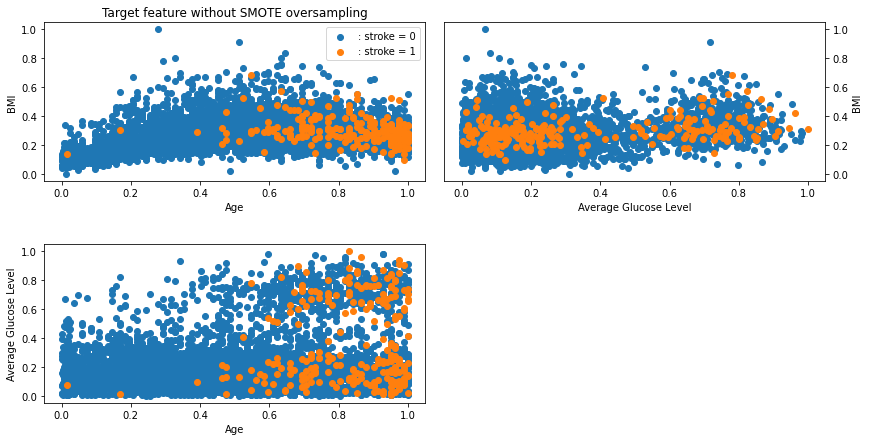

In [141]:
# Distribution of the dataset before oversampling:
df_0 = df[df.stroke==0]
df_1 = df[df.stroke==1]

plt.figure(figsize=(14,7))
plt.subplots_adjust(hspace=0.4, wspace=0.05)

plt.subplot(2,2,1)
plt.scatter(df_0.age, df_0.bmi, c='#1f77b4')
plt.scatter(df_1.age, df_1.bmi, c='#ff7f0e')
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend([": stroke = 0", ": stroke = 1"])
plt.title("Target feature without SMOTE oversampling")


ax = plt.subplot(2,2,2)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.scatter(df_0.avg_glucose_level, df_0.bmi, c='#1f77b4')
plt.scatter(df_1.avg_glucose_level, df_1.bmi, c='#ff7f0e')
plt.xlabel("Average Glucose Level")
plt.ylabel("BMI")

plt.subplot(2,2,3)
plt.scatter(df_0.age, df_0.avg_glucose_level, c='#1f77b4')
plt.scatter(df_1.age, df_1.avg_glucose_level, c='#ff7f0e')
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")

plt.show()

In [134]:
smote = SMOTE(sampling_strategy='minority', random_state=0)

x_train_smote = []
y_train_smote = []
train_smote = []

for k in range(len(x_train)):
  x_train_tmp, y_train_tmp = smote.fit_resample(x_train[k], y_train[k])
  x_train_smote.append(x_train_tmp)
  y_train_smote.append(y_train_tmp)

(5107, 17)
(7772, 16) (7772, 1)
(7772, 16) (7772, 1)
(7774, 16) (7774, 1)


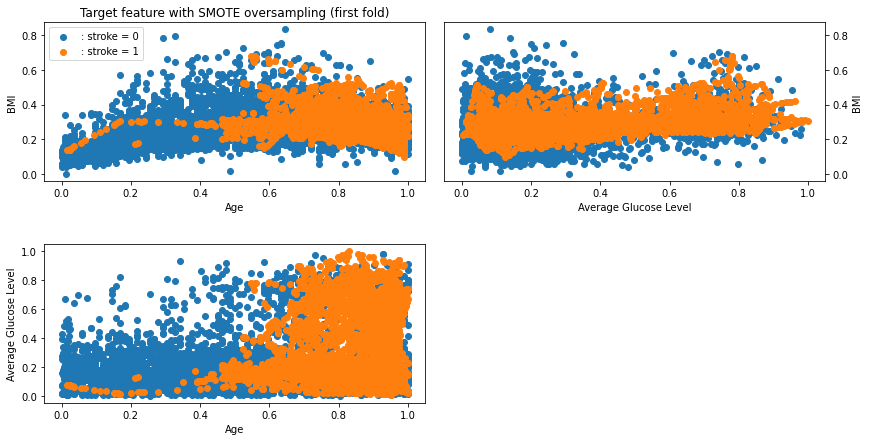

In [196]:
# Distribution of the dataset after oversampling:

# Look at data of the first fold:
df_smote = pd.concat([x_train_smote[0], y_train_smote[0]], axis=1)

df_0 = df_smote[df_smote.stroke==0]
df_1 = df_smote[df_smote.stroke==1]

plt.figure(figsize=(14,7))
plt.subplots_adjust(hspace=0.4, wspace=0.05)

plt.subplot(2,2,1)
plt.scatter(df_0.age, df_0.bmi, c='#1f77b4')
plt.scatter(df_1.age, df_1.bmi, c='#ff7f0e')
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend([": stroke = 0", ": stroke = 1"])
plt.title("Target feature with SMOTE oversampling (first fold)")


ax = plt.subplot(2,2,2)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.scatter(df_0.avg_glucose_level, df_0.bmi, c='#1f77b4')
plt.scatter(df_1.avg_glucose_level, df_1.bmi, c='#ff7f0e')
plt.xlabel("Average Glucose Level")
plt.ylabel("BMI")

plt.subplot(2,2,3)
plt.scatter(df_0.age, df_0.avg_glucose_level, c='#1f77b4')
plt.scatter(df_1.age, df_1.avg_glucose_level, c='#ff7f0e')
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")

plt.show()

In [249]:
def calc_model(model, x_train, y_train, y_test):
  """
  Function to computed the estimated data and the metrics
  """
  y_predicted   = [] # Save all predicted data
  cf            = []
  reports       = [] # save all reports 
  process_times = []
  metrics       = pd.DataFrame(columns=["Recall", "Precision", "F1-score", "Accuracy"])
     
  for k in range(len(x_train)):
    t0 = process_time()
    clf = model.fit(X=x_train[k], y=y_train[k].values.ravel())
    t1 = process_time()

    process_times.append(t1-t0) # Save the processing time

    # Get the predicted model:
    y_predicted.append( model.predict(x_test[k]))

    # Compute the confusion matrix:
    cf.append( pd.DataFrame(columns=["data_0","data_1"],index=["model_0","model_1"]))
    cf[k].loc[:,:] = confusion_matrix(y_true=y_test[k], y_pred=y_predicted[k])/len(y_test[k])

    #  Compute smote metrics:
    metrics.loc[k, "Recall"]    = recall_score   (y_true=y_test[k], y_pred=y_predicted[k], zero_division=0)
    metrics.loc[k, "Precision"] = precision_score(y_true=y_test[k], y_pred=y_predicted[k], zero_division=0)
    metrics.loc[k, "F1-score"]  = f1_score       (y_true=y_test[k], y_pred=y_predicted[k], zero_division=0)
    metrics.loc[k, "Accuracy"]  = accuracy_score (y_true=y_test[k], y_pred=y_predicted[k])

    # Get smote report:
    reports.append( classification_report(y_true=y_test[k], y_pred=y_predicted[k], zero_division=0))
   
  return y_predicted, cf, metrics, report, process_times

## 3.3 Logistic regression

In [250]:
model = LogisticRegression(random_state=0, max_iter=1000)
y_predicted, cf, metrics, report, process_times = calc_model(model, x_train_smote, y_train_smote, y_test)

In [251]:
print("Average process time: %4.3f s"%np.mean(process_times))

Average process time: 0.175 s


In [252]:
# Display the confusion matrices for each fold:
display(cf[0], cf[1], cf[2], cf[3], cf[4])

,data_0,data_1
model_0,0.720157,0.23092
model_1,0.01272,0.036204


,data_0,data_1
model_0,0.7182,0.232877
model_1,0.013699,0.035225


,data_0,data_1
model_0,0.688541,0.262488
model_1,0.010774,0.038198


,data_0,data_1
model_0,0.705191,0.245837
model_1,0.010774,0.038198


,data_0,data_1
model_0,0.739471,0.212537
model_1,0.011753,0.036239


In [253]:
# Display the metrics for every fold:
metrics

,Recall,Precision,F1-score,Accuracy
0,0.74,0.135531,0.229102,0.75636
1,0.72,0.131387,0.222222,0.753425
2,0.78,0.127036,0.218487,0.726738
3,0.78,0.134483,0.229412,0.743389
4,0.755102,0.145669,0.244224,0.77571


In [254]:
# Classification report of the first fold:
print(report[0])

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       972
           1       0.14      0.74      0.23        50

    accuracy                           0.76      1022
   macro avg       0.56      0.75      0.54      1022
weighted avg       0.94      0.76      0.82      1022



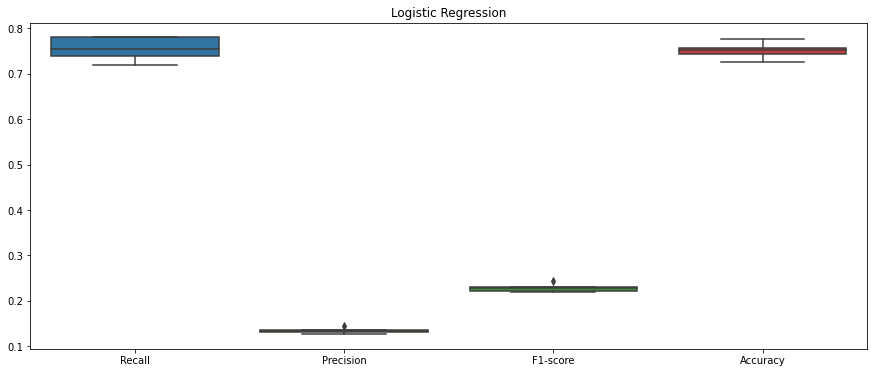

In [255]:
plt.figure(figsize=(15,6))
sns.boxplot(data=this_metrics)
plt.title("Logistic Regression")
plt.show()

## 3.3 Random Forest

In [256]:
model = RandomForestClassifier(random_state=0)
y_predicted, cf, metrics, report, process_times = calc_model(model, x_train_smote, y_train_smote, y_test)

In [257]:
print("Average process time: %4.3f s"%np.mean(process_times))

Average process time: 0.875 s


In [258]:
# Display the confusion matrices for each fold:
display(cf[0], cf[1], cf[2], cf[3], cf[4])

,data_0,data_1
model_0,0.855186,0.09589
model_1,0.037182,0.011742


,data_0,data_1
model_0,0.867906,0.08317
model_1,0.034247,0.014677


,data_0,data_1
model_0,0.836435,0.114594
model_1,0.033301,0.015671


,data_0,data_1
model_0,0.84427,0.106758
model_1,0.030362,0.018609


,data_0,data_1
model_0,0.854065,0.097943
model_1,0.03526,0.012733


In [259]:
# Display the metrics for every fold:
metrics

,Recall,Precision,F1-score,Accuracy
0,0.24,0.109091,0.15,0.866928
1,0.3,0.15,0.2,0.882583
2,0.32,0.120301,0.174863,0.852106
3,0.38,0.148438,0.213483,0.86288
4,0.265306,0.115044,0.160494,0.866797


In [260]:
# Classification report of the first fold:
print(report[0])

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       972
           1       0.14      0.74      0.23        50

    accuracy                           0.76      1022
   macro avg       0.56      0.75      0.54      1022
weighted avg       0.94      0.76      0.82      1022



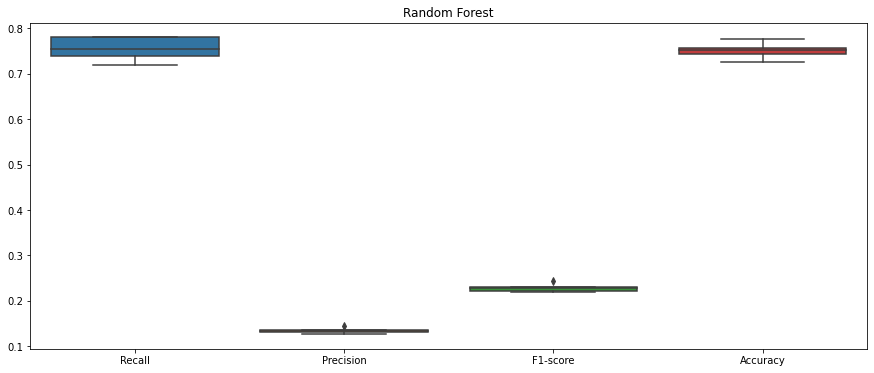

In [261]:
plt.figure(figsize=(15,6))
sns.boxplot(data=this_metrics)
plt.title("Random Forest")
plt.show()

## 3.4 Multi-Layer Perceptron

In [262]:
model = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=1000, random_state=0)
y_predicted, cf, metrics, report, process_times = calc_model(model, x_train_smote, y_train_smote, y_test)

In [263]:
print("Average process time: %4.3f s"%np.mean(process_times))

Average process time: 33.169 s


In [264]:
# Display the confusion matrices for each fold:
display(cf[0], cf[1], cf[2], cf[3], cf[4])

,data_0,data_1
model_0,0.772994,0.178082
model_1,0.026419,0.022505


,data_0,data_1
model_0,0.799413,0.151663
model_1,0.026419,0.022505


,data_0,data_1
model_0,0.755142,0.195886
model_1,0.027424,0.021548


,data_0,data_1
model_0,0.746327,0.204701
model_1,0.018609,0.030362


,data_0,data_1
model_0,0.809011,0.142997
model_1,0.029383,0.018609


In [265]:
# Display the metrics for every fold:
metrics

,Recall,Precision,F1-score,Accuracy
0,0.46,0.112195,0.180392,0.795499
1,0.46,0.129213,0.201754,0.821918
2,0.44,0.099099,0.161765,0.77669
3,0.62,0.129167,0.213793,0.77669
4,0.387755,0.115152,0.17757,0.82762


In [266]:
# Classification report of the first fold:
print(report[0])

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       972
           1       0.14      0.74      0.23        50

    accuracy                           0.76      1022
   macro avg       0.56      0.75      0.54      1022
weighted avg       0.94      0.76      0.82      1022



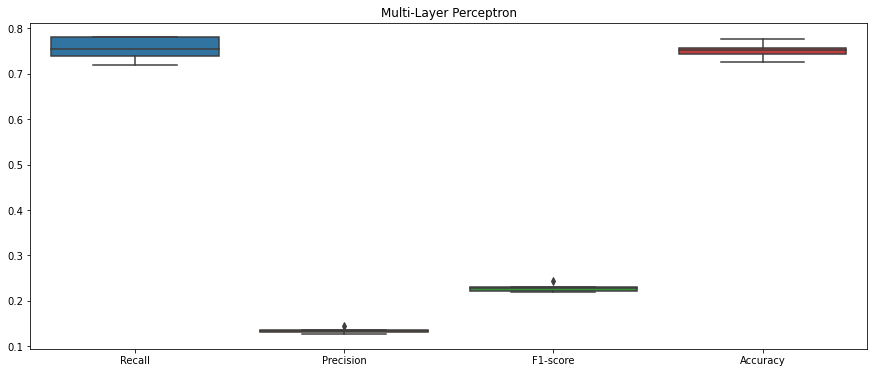

In [267]:
plt.figure(figsize=(15,6))
sns.boxplot(data=this_metrics)
plt.title("Multi-Layer Perceptron")
plt.show()

## 3.5 Support-Vector Classification

In [268]:
model = SVC(C=1.0, kernel='linear', class_weight='balanced')
y_predicted, cf, metrics, report, process_times = calc_model(model, x_train_smote, y_train_smote, y_test)

In [269]:
print("Average process time: %4.3f s"%np.mean(process_times))

Average process time: 1.994 s


In [270]:
# Display the confusion matrices for each fold:
display(cf[0], cf[1], cf[2], cf[3], cf[4])

,data_0,data_1
model_0,0.702544,0.248532
model_1,0.006849,0.042074


,data_0,data_1
model_0,0.69863,0.252446
model_1,0.011742,0.037182


,data_0,data_1
model_0,0.669931,0.281097
model_1,0.008815,0.040157


,data_0,data_1
model_0,0.68952,0.261508
model_1,0.008815,0.040157


,data_0,data_1
model_0,0.716944,0.235064
model_1,0.009794,0.038198


In [271]:
# Display the metrics for every fold:
metrics

,Recall,Precision,F1-score,Accuracy
0,0.86,0.144781,0.247839,0.744618
1,0.76,0.128378,0.219653,0.735812
2,0.82,0.125,0.216931,0.710088
3,0.82,0.133117,0.22905,0.729677
4,0.795918,0.139785,0.237805,0.755142


In [272]:
# Classification report of the first fold:
print(report[0])

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       972
           1       0.14      0.74      0.23        50

    accuracy                           0.76      1022
   macro avg       0.56      0.75      0.54      1022
weighted avg       0.94      0.76      0.82      1022



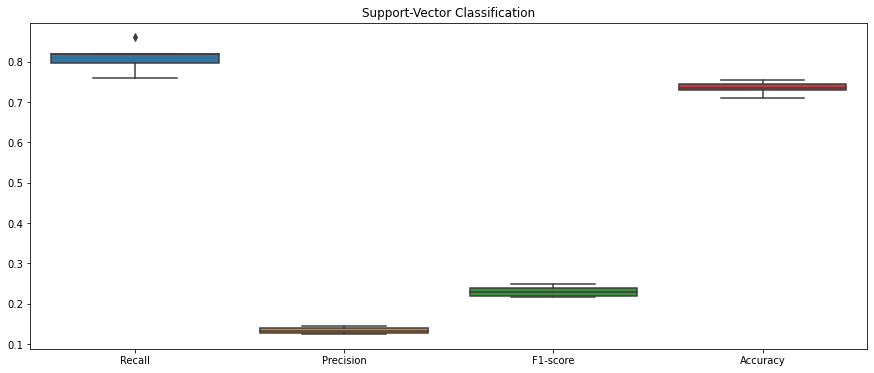

In [273]:
plt.figure(figsize=(15,6))
sns.boxplot(data=metrics)
plt.title("Support-Vector Classification")
plt.show()